# Clustering - Intro

## K-Means Clustering
The K-Means algorithm is one of the fastest clustering algorithms, and also one of the simplest:

- First initialize `k` centroids randomly: e.g.`k`, distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
- Repeat until convergence (i.e., until the centroids stop moving):
   Assign each instance to the closest centroid.
   Update the centroids to be the mean of the instances that are assigned to them.

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

The estimator ```sklearn.cluster.KMeans()``` performs k-means clustering in Python. 

## Example 1: Randomly Generated 2-Cluster Dataset
We begin with a simple simulated example in which there truly are two clusters in the data: the first 25 observations have a mean shift relative to the next 25 observations.

In [3]:
np.random.seed(0)
X = np.random.standard_normal((50,2))
X[:25,0] += 3
X[:25,1] -= 4

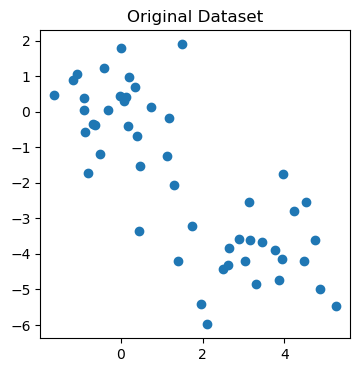

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(X[:,0], X[:,1])
ax.set_title("Original Dataset");

### K-means clustering with k=2

In [6]:
kmeans2 = KMeans(n_clusters=2,
                random_state=2,
                n_init=20).fit(X)

In [7]:
kmeans2

KMeans(n_clusters=2, n_init=20, random_state=2)

In [8]:
kmeans2.inertia_

99.31537074091582

We specify random_state to make the results reproducible. The cluster assignments of the 50 observations are contained in ```kmeans.labels_```

In [9]:
kmeans2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

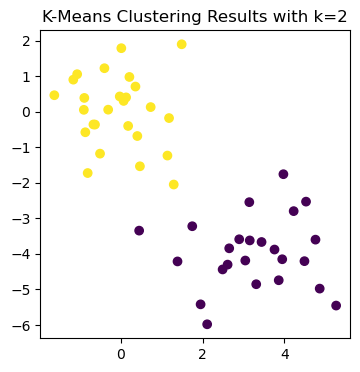

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(X[:,0], X[:,1], c=kmeans2.labels_)
ax.set_title("K-Means Clustering Results with k=2");

Here the observations can be easily plotted because they are two-dimensional. If there were more than two variables then we could instead perform PCA and plot the first two principal component score vectors to represent the clusters.PCA will be covered in the next lecture. 

### Why not k=3?

In this example, we knew that there really were two clusters because we generated the data. However, for real data, we do not know the true number of clusters, nor whether they exist in any precise way. We could instead have performed k-means clustering on this example with ```k=3```.

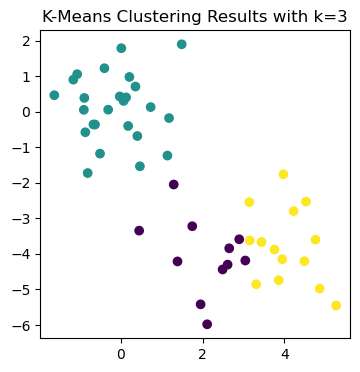

In [13]:
kmeans3 = KMeans(n_clusters=3,
                random_state=3,
                n_init=20).fit(X)
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:,0], X[:,1], c=kmeans3.labels_)
ax.set_title("K-Means Clustering Results with k=3");

### Inertia

To select the best model, we need a way to evaluate KMeans model's performance. Since clustering is an unsupervised task, we can't validate the results (there are no labels/outputs). We can measure the distance between each observation (data point) and its centroid - and this is the _inertia_ metric. Remember, we are grouping the similar data points, hence the minimum distance. 

In [15]:
kmeans2.inertia_

99.31537074091582

In [16]:
kmeans3.inertia_

75.06261242745384

Verify that the inertia is the sum of the squared distances between each training instance and its closest centroid:

In [18]:
# extra code
X_dist = kmeans3.transform(X)
(X_dist[np.arange(len(X_dist)), kmeans3.labels_] ** 2).sum()

75.06261242745386

### Using Elbow Plot to Identify ```k```

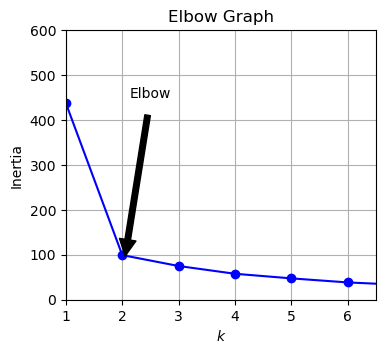

In [19]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=20, random_state=3).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(4, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(2, inertias[3]), xytext=(2.5, 450),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(2.5, 450, "Elbow", horizontalalignment="center")
plt.axis([1, 6.5, 0, 600])
plt.grid()
plt.title("Elbow Graph");

As you can see, there is an elbow at ```k=2``` which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So ```k=2``` is a pretty good choice. 

In [20]:
kmeans_per_k # list of all the kmeans models created for the example

[KMeans(n_clusters=1, n_init=20, random_state=3),
 KMeans(n_clusters=2, n_init=20, random_state=3),
 KMeans(n_clusters=3, n_init=20, random_state=3),
 KMeans(n_clusters=4, n_init=20, random_state=3),
 KMeans(n_clusters=5, n_init=20, random_state=3),
 KMeans(n_clusters=6, n_init=20, random_state=3),
 KMeans(n_clusters=7, n_init=20, random_state=3),
 KMeans(n_init=20, random_state=3),
 KMeans(n_clusters=9, n_init=20, random_state=3)]

### Silhouette Score

Accounting for the within-cluster and between-cluster distances

Another approach is to look at the *silhouette score*, which is the mean *silhouette score* over all the instances. An instance's silhouette coefficient is equal to (b - a) / max(a, b) where a is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and b is the *mean nearest-cluster* distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes b, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

Silhouette score:
- close to +1 is good cluster assignment
- close to 0 is close to cluster boundary
- close to -1 is bad cluster assignment

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
silhouette_score(X, kmeans2.labels_)

0.6477833080264647

In [17]:
silhouette_score(X, kmeans3.labels_)

0.47943201859384615

Silhouette score is higher the better, in this case comparing the ```k=2``` vs ```k=3```, 0.65 vs 0.48, ```k=2``` is a better choice with the higher score. 

Below we compare more options:

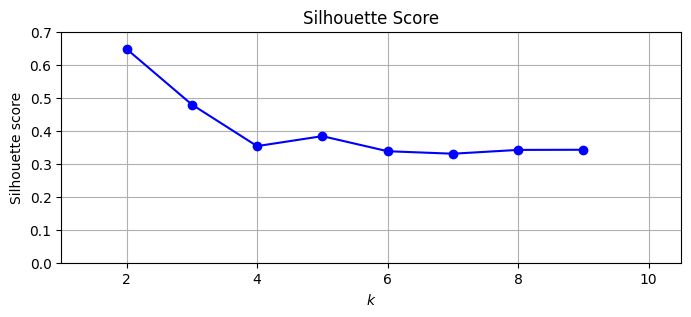

In [18]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1, 10.5, 0, 0.7])
plt.grid()
plt.title("Silhouette Score")
plt.show()

From the *silhouette score* graph, ```k=2``` shows the highest silhouette score, hence we can conclude ```k=2``` is a better option then the rest (meaning has more observations are within their own clusters, dense clusters and clusters that are away from each other). 

### Rule-of-thumb in setting ```n_init``` and ```random_state```

Always run k-means clustering with a large value of ```n_init```, such as 20 or 50, since otherwise an undesirable local optimum may be obtained. 

When performing k-means clustering, in addition to using multiple initial cluster assignments, it is also important to set a random seed using the ```random_state``` argument to KMeans(). This way, the initial cluster assignments in Step 1 can be replicated, and the k-means output will be fully reproducible.

In [19]:
kmeans1 = KMeans(n_clusters=3,
                random_state=3,
                n_init=1).fit(X)
kmeans20 = KMeans(n_clusters=3,
                  random_state=3,
                  n_init=20).fit(X);
kmeans1.inertia_, kmeans20.inertia_

(76.85131986999252, 75.06261242745384)

We have used the ```n_init``` argument to run the k-means with 20 initial cluster assignments (the default is 10). If a value of n_init greater than one is used, then k-means clustering will be performed using multiple random assignments in Step 1 of the algorithm, and the KMeans() function will report only the best results. Here we compared using ```n_init=1``` to ```n_init=20```. We can compare the results using the ```kmeans.inertia_```, which is the total within-cluster sum of squares, we seek to minimize by performing k-means clustering.

## Example 2: Make Moons

In [21]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

In [22]:
X[0],y[0]

(array([0.81680544, 0.5216447 ]), 0)

In [23]:
X[1],y[1]

(array([ 1.61859642, -0.37982927]), 1)

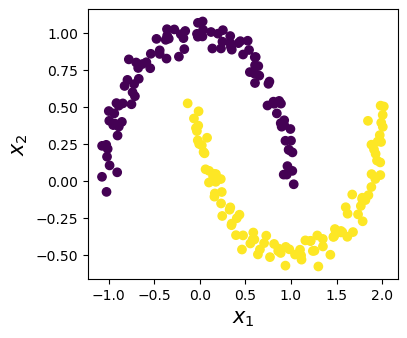

In [24]:
plt.figure(figsize=(4, 3.5))
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.xlabel(r"$x_1$", fontsize=15) # X contains two features, x1 and x2
plt.ylabel(r"$x_2$", fontsize=15)
plt.show()

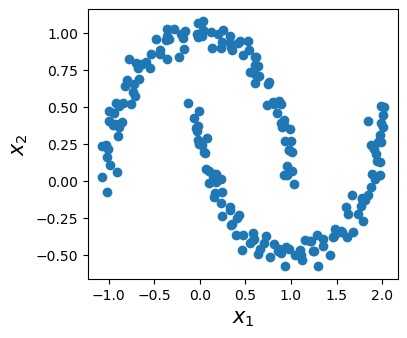

In [25]:
plt.figure(figsize=(4, 3.5))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel(r"$x_1$", fontsize=15) # X contains two features, x1 and x2
plt.ylabel(r"$x_2$", fontsize=15)
plt.show()

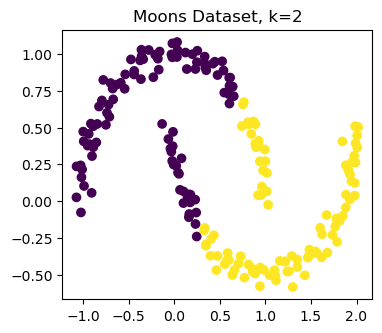

In [27]:
labels = KMeans(2, n_init = 20, random_state=0).fit_predict(X)
plt.figure(figsize=(4, 3.5))
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Moons Dataset, k=2");

### Evaluating Clustering: Adjusted Rand Index (ARI) IF you have labels

The ARI computes similarity between discovered communities and “ground-truth” communities - when you have the labels! The higher the better, changes between 0 to 1, where 0 is a random cluster assignment, and 1 is a perfect score. 

In [28]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(y, labels)

0.25636350688711773

#### K-Means, use more clusters to explain the data
Here we are separating the two half-moon shapes using a linear model, which would not have been possible using the original two features.

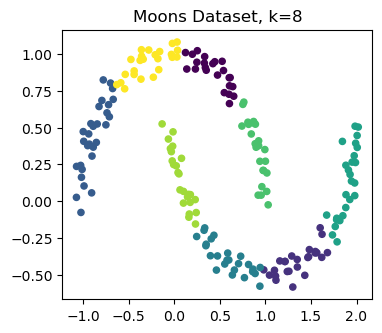

In [29]:
labels = KMeans(8, random_state=0,n_init=20).fit_predict(X)
plt.figure(figsize=(4, 3.5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=20)
plt.title("Moons Dataset, k=8");

In [28]:
adjusted_rand_score(y, labels)

0.2445612498174916

### Spectral Clustering

uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm. Useful when the structure of the individual clusters is highly non-convex, or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster, such as when clusters are nested circles on the 2D plane.

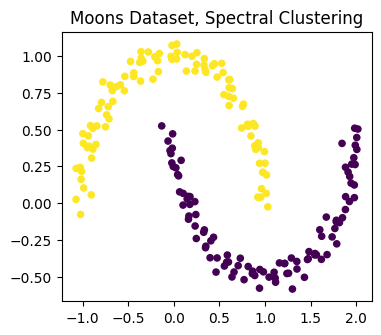

In [29]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',assign_labels='kmeans',random_state=0, n_init=20)
labels = model.fit_predict(X)
plt.figure(figsize=(4, 3.5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=20)
plt.title("Moons Dataset, Spectral Clustering");

In [30]:
adjusted_rand_score(y, labels)

1.0

Spectral clustering has a perfect ARI score of 1. 

**References: ISLP CH12 & AGeron CH9**